In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import os

forders = os.listdir('/content/drive/MyDrive/네이버리뷰크롤링')
%cd /content/drive/MyDrive/네이버리뷰크롤링
new = pd.DataFrame()

for files in forders:
    df = pd.read_csv(files)
    new = pd.concat([new, df])

output = new[['category', 'product_name', 'content', 'star_rating']]
print(output)

/content/drive/MyDrive/네이버리뷰크롤링
      category                    product_name  \
0          면도기  도루코 페이스7II 프레쉬 면도기+면도날11입+쉐이빙폼   
1          면도기  도루코 페이스7II 프레쉬 면도기+면도날11입+쉐이빙폼   
2          면도기  도루코 페이스7II 프레쉬 면도기+면도날11입+쉐이빙폼   
3          면도기  도루코 페이스7II 프레쉬 면도기+면도날11입+쉐이빙폼   
4          면도기  도루코 페이스7II 프레쉬 면도기+면도날11입+쉐이빙폼   
...        ...                             ...   
19995   스탠드옷걸이      지엔 이동식 행거 철제 스탠드 옷걸이 강철 일자   
19996   스탠드옷걸이      지엔 이동식 행거 철제 스탠드 옷걸이 강철 일자   
19997   스탠드옷걸이      지엔 이동식 행거 철제 스탠드 옷걸이 강철 일자   
19998   스탠드옷걸이      지엔 이동식 행거 철제 스탠드 옷걸이 강철 일자   
19999   스탠드옷걸이      지엔 이동식 행거 철제 스탠드 옷걸이 강철 일자   

                                                 content  star_rating  
0      아주 저렴하게 구매했어요. 면도날은 수염이 많아서 원래 쓰던 제품이고 면도기는 5년...            5  
1                                       항상 잘 쓰고 있어요! 굳굳!            5  
2                                        쓸만합니다. 잘 쓰겠습니다.            5  
3                                            배송도 빠르고 좋아요            5

In [21]:
output.to_csv("navertotal.csv", index = False)

In [25]:
unique_values = output['star_rating'].unique()
print(unique_values)

[5 4 3 2 1]


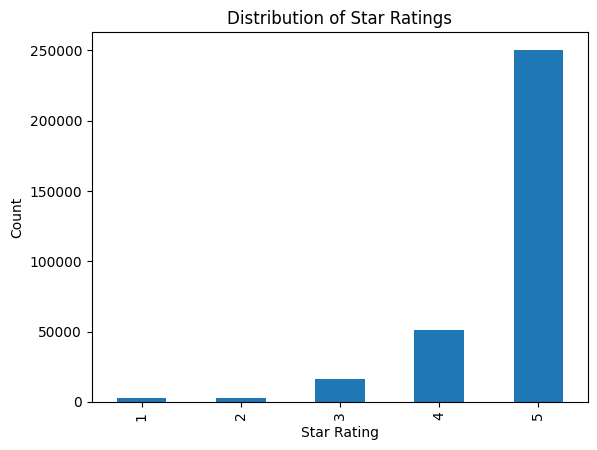

In [26]:
#print(output['star_rating'].dtypes)
import matplotlib.pyplot as plt
output['star_rating'].value_counts().sort_index().plot(kind='bar')

# Setting the labels and title for the plot
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings')

# Displaying the plot
plt.show()

<ipython-input-34-c6ec100db200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['label'] = np.select([output.star_rating > 3], [1], default=0)


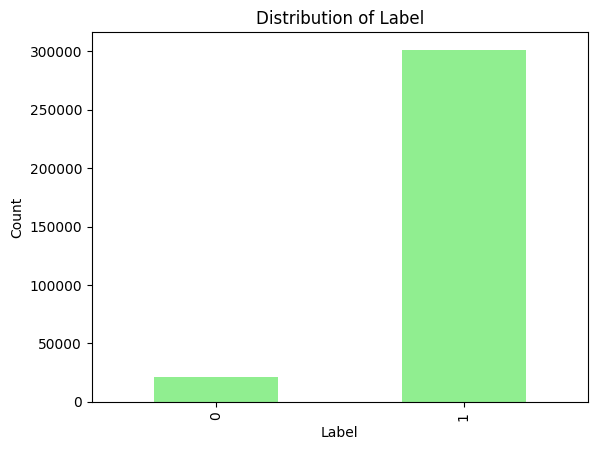

In [34]:
#긍,부정 비율
import numpy as np
output['label'] = np.select([output.star_rating > 3], [1], default=0)

output['label'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')
plt.show()